In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager, rc
import plotly.express as px
import datetime as dt

In [2]:
df = pd.read_excel('미니프로젝트-쇼핑몰 실습데이터.xlsx')
df2 = df.copy()
purchase = df2[df2['처리상태'] == '구매확정']     # 구매확정인 값만 출력
purchase = purchase.loc[:, (purchase.columns != '초도상품') & (purchase.columns != '제작문구 내역')]     # 필요없는 변수 제거
purchase = purchase.replace('지니 태블릿(후불집행)','지니 태블릿')
purchase = purchase.reset_index(drop = True)     # 인덱스 초기화

## 4. 시간대별 이용자 수 분석

In [58]:
# '주문일자'에서 연, 월, 일을 빼고 시간대로 묶기
result = purchase.groupby(df['주문일자'].dt.hour)['주문번호'].nunique() #주문번호 중복뺌

In [59]:
result = result.reset_index()
result

,주문일자,주문번호
0,0,2318
1,1,1284
2,2,1038
3,3,1272
4,4,742
5,5,717
6,6,706
7,7,990
8,8,2235
9,9,3782


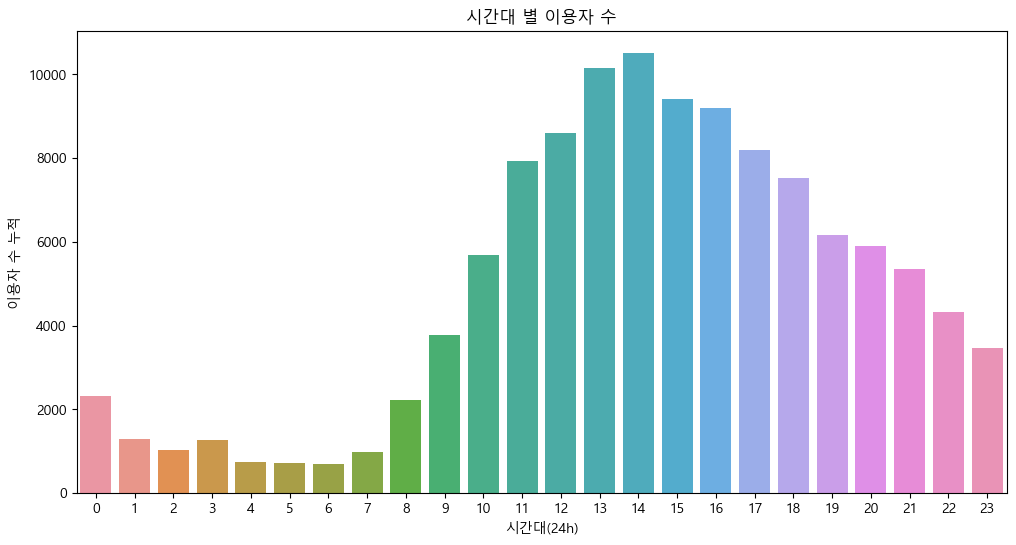

In [60]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(12, 6))
sns.barplot(x='주문일자', y='주문번호', data=result)
plt.xlabel("시간대(24h)")
plt.ylabel("이용자 수 누적")
plt.title(f'시간대 별 이용자 수')
plt.show()